In [1]:
import warnings
warnings.filterwarnings("ignore")

import xarray as xr
import netCDF4
import glob
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec
from matplotlib.colorbar import Colorbar
import numpy as np
import copy 
from scipy.interpolate import griddata
from scipy.interpolate import interp1d
from pyproj import Proj
import matplotlib.pyplot as plt
import geopy
from geopy.distance import VincentyDistance
import matplotlib.patches as patches
from matplotlib import colors

%matplotlib inline
from matplotlib.colors import LinearSegmentedColormap

import os, os.path

In [2]:

def find_closest_point(lats, lons, lat_cons_SGP, lon_cons_SGP):
    # Compute the squared distance between the target point and all points in the grid
    distance_squared = (lats - lat_cons_SGP)**2 + (lons - lon_cons_SGP)**2
    
    # Find the index of the minimum distance
    min_index = np.unravel_index(np.argmin(distance_squared), lats.shape)
    
    return min_index

In [3]:

def find_closest_point_1d(lats, lons, lat_cons_SGP, lon_cons_SGP):
    # Calculate the absolute difference between the target latitude and all latitudes in the array
    lat_diff = np.abs(lats - lat_cons_SGP)
    
    # Calculate the absolute difference between the target longitude and all longitudes in the array
    lon_diff = np.abs(lons - lon_cons_SGP)
    
    # Find the index of the minimum difference in latitude
    lat_index = np.argmin(lat_diff)
    
    # Find the index of the minimum difference in longitude
    lon_index = np.argmin(lon_diff)
    
    return lat_index, lon_index

# Site Locations

In [4]:

lat_cons_SGP=36.63704
lon_cons_SGP=-97.53817

lat_cons_UAH=34.7244
lon_cons_UAH=-86.6463

lat_cons_BNF=34.342481
lon_cons_BNF=-87.338177

lat_cons_s20=34.653784
lon_cons_s20=-87.292676

lat_cons_s30=34.384829
lon_cons_s30=-86.927905

lat_cons_s40=34.178796
lon_cons_s40=-87.453905


In [5]:
delta=0.03

# Read in clear-sky surface reflectance data

In [6]:
file_ClearSky_Reflectance= xr.open_dataset(glob.glob(f'./Data/ClearSky_Reflectance.nc')[0])

SGP_Reflectance_time_loc=file_ClearSky_Reflectance.SGP_ClearSky_Reflectance.values
dynamic_reflectance_loc=file_ClearSky_Reflectance.NA_ClearSky_Reflectance.values
lats_Dynamic=file_ClearSky_Reflectance.lats_NA.values
lons_Dynamic=file_ClearSky_Reflectance.lons_NA.values


# SGP

In [7]:
lats_SGP=file_ClearSky_Reflectance.nlat_SGP.values
lons_SGP=file_ClearSky_Reflectance.nlon_SGP.values

# Find the closest point in the grid
closest_lat_index, closest_lon_index = find_closest_point_1d(lats_SGP, lons_SGP, lat_cons_SGP, lon_cons_SGP)

print("Closest index:", closest_lat_index,closest_lon_index)
print("Closest latitude:", lats_SGP[closest_lat_index])
print("Closest longitude:", lons_SGP[closest_lon_index])

Closest index: 527 392
Closest latitude: 36.635
Closest longitude: -97.54


In [8]:
loc_SGP_lat=np.where( (lats_SGP>=(lat_cons_SGP-delta)) & (lats_SGP<=(lat_cons_SGP+delta)) ) 
loc_SGP_lon=np.where( (lons_SGP>=(lon_cons_SGP-delta)) & (lons_SGP<=(lon_cons_SGP+delta)) ) 

SGP_Reflectance_time_locs=SGP_Reflectance_time_loc[:,loc_SGP_lat[0],:][:,:,loc_SGP_lon[0]]
SGP_Reflectance_time_locs.shape

(10, 12, 12)

# NA

In [9]:
 
    
# Find the closest point in the grid
closest_index_Dynamic = find_closest_point(lats_Dynamic, lons_Dynamic, lat_cons_UAH, lon_cons_UAH)

print("Closest index:", closest_index_Dynamic)
print("Closest latitude:", lats_Dynamic[closest_index_Dynamic])
print("Closest longitude:", lons_Dynamic[closest_index_Dynamic])


Closest index: (245, 302)
Closest latitude: 34.721756
Closest longitude: -86.64521


In [10]:


loc_UAH=np.where( (lats_Dynamic>=(lat_cons_UAH-delta)) & (lats_Dynamic<=(lat_cons_UAH+delta)) & 
                  (lons_Dynamic>=(lon_cons_UAH-delta)) & (lons_Dynamic<=(lon_cons_UAH+delta)) ) 


loc_BNF=np.where( (lats_Dynamic>=(lat_cons_BNF-delta)) & (lats_Dynamic<=(lat_cons_BNF+delta)) & 
                  (lons_Dynamic>=(lon_cons_BNF-delta)) & (lons_Dynamic<=(lon_cons_BNF+delta)) ) 


loc_s20=np.where( (lats_Dynamic>=(lat_cons_s20-delta)) & (lats_Dynamic<=(lat_cons_s20+delta)) & 
                  (lons_Dynamic>=(lon_cons_s20-delta)) & (lons_Dynamic<=(lon_cons_s20+delta)) ) 


loc_s30=np.where( (lats_Dynamic>=(lat_cons_s30-delta)) & (lats_Dynamic<=(lat_cons_s30+delta)) & 
                  (lons_Dynamic>=(lon_cons_s30-delta)) & (lons_Dynamic<=(lon_cons_s30+delta)) ) 

loc_s40=np.where( (lats_Dynamic>=(lat_cons_s40-delta)) & (lats_Dynamic<=(lat_cons_s40+delta)) & 
                  (lons_Dynamic>=(lon_cons_s40-delta)) & (lons_Dynamic<=(lon_cons_s40+delta)) ) 

print(loc_UAH[0].shape[0],loc_BNF[0].shape[0],\
      loc_s20[0].shape[0],loc_s30[0].shape[0],loc_s40[0].shape[0])


101 102 103 92 103


In [11]:
UAH_Reflectance_time_locs=dynamic_reflectance_loc[:,:,loc_UAH[0],loc_UAH[1]]
BNF_Reflectance_time_locs=dynamic_reflectance_loc[:,:,loc_BNF[0],loc_BNF[1]]

s20_Reflectance_time_locs=dynamic_reflectance_loc[:,:,loc_s20[0],loc_s20[1]]
s30_Reflectance_time_locs=dynamic_reflectance_loc[:,:,loc_s30[0],loc_s30[1]]
s40_Reflectance_time_locs=dynamic_reflectance_loc[:,:,loc_s40[0],loc_s40[1]]


# Generate PDF

In [12]:
reflectance_bins=np.arange(18)*0.01+0.03


In [13]:
def get_pdfs(SGP_Reflectance_time_locs,reflectance_bins):
    
    half_bins=(reflectance_bins[1]-reflectance_bins[0])/2.
    
    sample_number=np.zeros_like(reflectance_bins)
    
    for i in np.arange(len(reflectance_bins)): 
        
        loc=np.where( (SGP_Reflectance_time_locs>(reflectance_bins[i]-half_bins) ) &\
                      (SGP_Reflectance_time_locs<=(reflectance_bins[i]+half_bins)) )
                     
        sample_number[i]=loc[0].shape[0]
                     
                     
    return sample_number                                                                               
                                                                                     
    

In [14]:
sample_number_SGP=get_pdfs(SGP_Reflectance_time_locs,reflectance_bins)

sample_number_UAH=get_pdfs(UAH_Reflectance_time_locs,reflectance_bins)
sample_number_BNF=get_pdfs(BNF_Reflectance_time_locs,reflectance_bins)

sample_number_s20=get_pdfs(s20_Reflectance_time_locs,reflectance_bins)
sample_number_s30=get_pdfs(s30_Reflectance_time_locs,reflectance_bins)
sample_number_s40=get_pdfs(s40_Reflectance_time_locs,reflectance_bins)


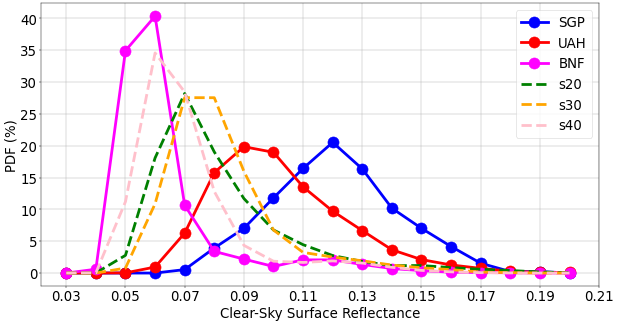

In [15]:

mpl.rcParams['font.size'] = 24
mpl.rcParams['font.weight'] = 'regular'
mpl.rcParams['font.family'] = 'DejaVu Sans'
fig = plt.figure(figsize=[18,9], dpi=40)

gs = gridspec.GridSpec(1, 20)
gs.update(wspace=0.5, hspace=0.3, top=0.91)

ax2 = plt.subplot(gs[0,0:20])


######
ax2.plot(reflectance_bins, 100.*sample_number_SGP/np.nansum(sample_number_SGP),'-o', label='SGP',color='blue',linewidth=5,markersize=20)
ax2.plot(reflectance_bins, 100.*sample_number_UAH/np.nansum(sample_number_UAH),'-o', label='UAH',color='red',linewidth=5,markersize=20)
ax2.plot(reflectance_bins, 100.*sample_number_BNF/np.nansum(sample_number_BNF),'-o', label='BNF',color='magenta',linewidth=5,markersize=20)

ax2.plot(reflectance_bins, 100.*sample_number_s20/np.nansum(sample_number_s20),'--', label='s20',color='green',linewidth=5,markersize=20)
ax2.plot(reflectance_bins, 100.*sample_number_s30/np.nansum(sample_number_s30),'--', label='s30',color='orange',linewidth=5,markersize=20)
ax2.plot(reflectance_bins, 100.*sample_number_s40/np.nansum(sample_number_s40),'--', label='s40',color='pink',linewidth=5,markersize=20)

ax2.set_xlabel('Clear-Sky Surface Reflectance')
ax2.set_ylabel('PDF (%)')
ax2.grid()
ax2.legend()
ax2.set_xticks(np.arange(10)*0.02+0.03)

#fig.savefig(f'./PDF_Locations_ClearSky_Reflectance.png', dpi=300, bbox_inches='tight')


# Spatial

In [16]:
dynamic_reflectance_loc_mean=np.nanmean(dynamic_reflectance_loc,axis=0)
dynamic_reflectance_loc_mean_time=dynamic_reflectance_loc_mean[5,:,:]

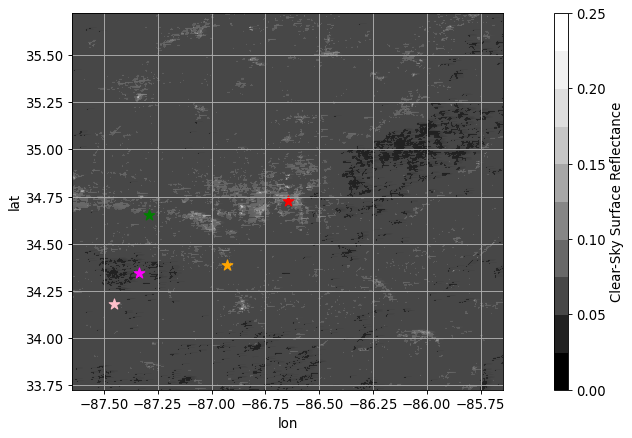

In [17]:


mpl.rcParams['font.size'] = 12
mpl.rcParams['font.weight'] = 'regular'
mpl.rcParams['font.family'] = 'DejaVu Sans'
fig = plt.figure(figsize=[8,6], dpi=80)

gs = gridspec.GridSpec(1, 23)
gs.update(wspace=0.5, hspace=0.3, top=0.91)



ax3 = plt.subplot(gs[0,0:20])
cax3 = plt.subplot(gs[0,22:23])


cmap = plt.get_cmap('Greys_r')
bounds=np.arange( 11 )*0.025
norm = colors.BoundaryNorm(bounds, cmap.N)


c3 = ax3.scatter(lons_Dynamic, lats_Dynamic,  cmap=cmap,norm=norm, marker='s',\
                 c=dynamic_reflectance_loc_mean_time) 


ax3.set_xlabel('lon')
ax3.set_ylabel('lat')
cb3 = Colorbar(mappable=c3, ax=cax3, orientation='vertical')
cb3.set_label('Clear-Sky Surface Reflectance')

c2=ax3.scatter(lon_cons_UAH,lat_cons_UAH,s=100,color='red',marker='*')    
c2=ax3.scatter(lon_cons_BNF,lat_cons_BNF,s=100,color='magenta',marker='*')   
c2=ax3.scatter(lon_cons_s20,lat_cons_s20,s=100,color='green',marker='*')   
c2=ax3.scatter(lon_cons_s30,lat_cons_s30,s=100,color='orange',marker='*')   
c2=ax3.scatter(lon_cons_s40,lat_cons_s40,s=100,color='pink',marker='*')  

latmin_m=lat_cons_UAH-1.
latmax_m= lat_cons_UAH+1.
lonmin_m= lon_cons_UAH-1.
lonmax_m=lon_cons_UAH+1.

ax3.set_xlim(lonmin_m,lonmax_m )
ax3.set_ylim(latmin_m,latmax_m)

ax3.grid()

#fig.savefig(f'./UAH_Clear_Sky_Reflectance.png', dpi=300, bbox_inches='tight')

